#### Importing the libraries.

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")


In [2]:
#import the useful libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

#### Read in the Data set. 

In [3]:
#read the data set of "loan" in inp0.
inp0= pd.read_csv("loan.csv")

In [4]:
#The head of the data frame.
inp0.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
#The dtypes of dataset.
inp0.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

#### Fixing rows and columns.

In [6]:
#columns with null values
inp0.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
# percentage of missing values in each column
missing_values = round(inp0.isnull().sum()/len(inp0.index), 2)*100
missing_values

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [8]:
# shape of the dataset
inp0.shape

(39717, 111)

In [9]:
# printing the columns having more than 70% missing values
columns_with_high_missing= missing_values[missing_values>70]
columns_with_high_missing

mths_since_last_record             93.0
next_pymnt_d                       97.0
mths_since_last_major_derog       100.0
annual_inc_joint                  100.0
dti_joint                         100.0
verification_status_joint         100.0
tot_coll_amt                      100.0
tot_cur_bal                       100.0
open_acc_6m                       100.0
open_il_6m                        100.0
open_il_12m                       100.0
open_il_24m                       100.0
mths_since_rcnt_il                100.0
total_bal_il                      100.0
il_util                           100.0
open_rv_12m                       100.0
open_rv_24m                       100.0
max_bal_bc                        100.0
all_util                          100.0
total_rev_hi_lim                  100.0
inq_fi                            100.0
total_cu_tl                       100.0
inq_last_12m                      100.0
acc_open_past_24mths              100.0
avg_cur_bal                       100.0


In [10]:
# droping the columns having more than 70% missing values.
columns_to_drop = missing_values[missing_values>70].index

In [11]:
inp0 = inp0.drop(columns=columns_to_drop)

In [12]:
#checking foe shape again.
inp0.shape

(39717, 55)

In [13]:
#check for null values percentage again.
(inp0.isnull().sum()/len(inp0.index))*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [14]:
# check the column with next highest missing value.
inp0.mths_since_last_delinq.head()

0     NaN
1     NaN
2     NaN
3    35.0
4    38.0
Name: mths_since_last_delinq, dtype: float64

In [15]:
# check the column with next highest missing value.
inp0.desc.head()

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object

In [16]:
#drop these columns also.
inp0 = inp0.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [17]:
#checking foe shape again.
inp0.shape

(39717, 53)

In [18]:
#Again check for missing percentage.
(inp0.isnull().sum()/len(inp0.index))*100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [19]:
#checking for missing values in rows
inp0.isnull().sum(axis=1)


0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [20]:
# checking whether some rows have more than 10 missing values
inp0[inp0.isnull().sum(axis=1) > 10]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [21]:
# check whether all columns are in the correct format.
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [22]:
# checking for int rate column.
inp0.int_rate.head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [23]:
#converting int rate column into float.
inp0['int_rate'] = inp0['int_rate'].apply(lambda x: float(x.split("%")[0]))

In [24]:
# checking for int rate column dtype again.
inp0.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [25]:
#droping the variables which is not important.
inp0 = inp0.drop(['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type',
 'title', 
 'url',
 'zip_code',
 'addr_state'], axis= 1)

In [26]:
#check for shape.
inp0.shape

(39717, 28)

In [27]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

Now let's try to look for the most important variable.


In [28]:
#check for the loan_status variable.
inp0.loan_status.info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: loan_status
Non-Null Count  Dtype 
--------------  ----- 
39717 non-null  object
dtypes: object(1)
memory usage: 310.4+ KB


In [29]:
inp0.loan_status.head()

0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
4        Current
Name: loan_status, dtype: object

Since we cannot analyse those loans which are currently active because there can be a success or default so for now we cannot take that into analysis so we simply try to ignore them and continue our analysis with fully paid and charged off status loans to analyse the default pattern.

We need to relabel the values to a binary form - 0 or 1, 1 indicating that the person has defaulted and 0 otherwise.

In [30]:
inp0['loan_status'] = inp0['loan_status'].astype('category')
inp0['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [31]:
# Remove current loans and mark other as binary 0 & 1.
inp0 = inp0[inp0['loan_status'] != 'Current']

In [32]:
inp0['loan_status'] = inp0['loan_status'].apply(lambda x: int(0) if x=='Fully Paid' else int(1))

In [33]:
# check for the loan status columns.
inp0['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

### Univariate Analysis

let's look at the overall default rate.

In [34]:
#Check for default rate
round(np.mean(inp0['loan_status']), 2)

0.15

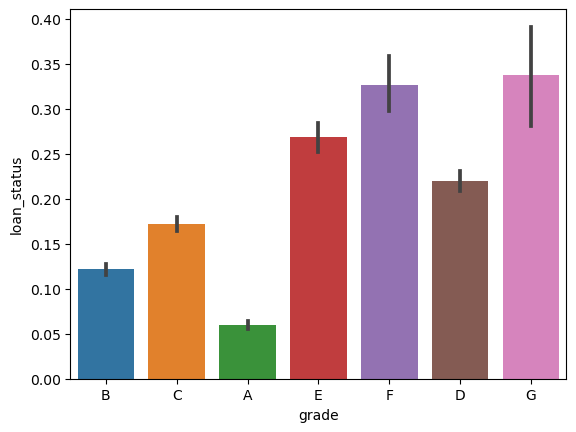

In [35]:
# plotting default rates across grade of the loan
sns.barplot(data=inp0, x='grade', y='loan_status')
plt.show()

As we can see the default rate increases from A to G,
because the grade is decided based on the risk of the loan.

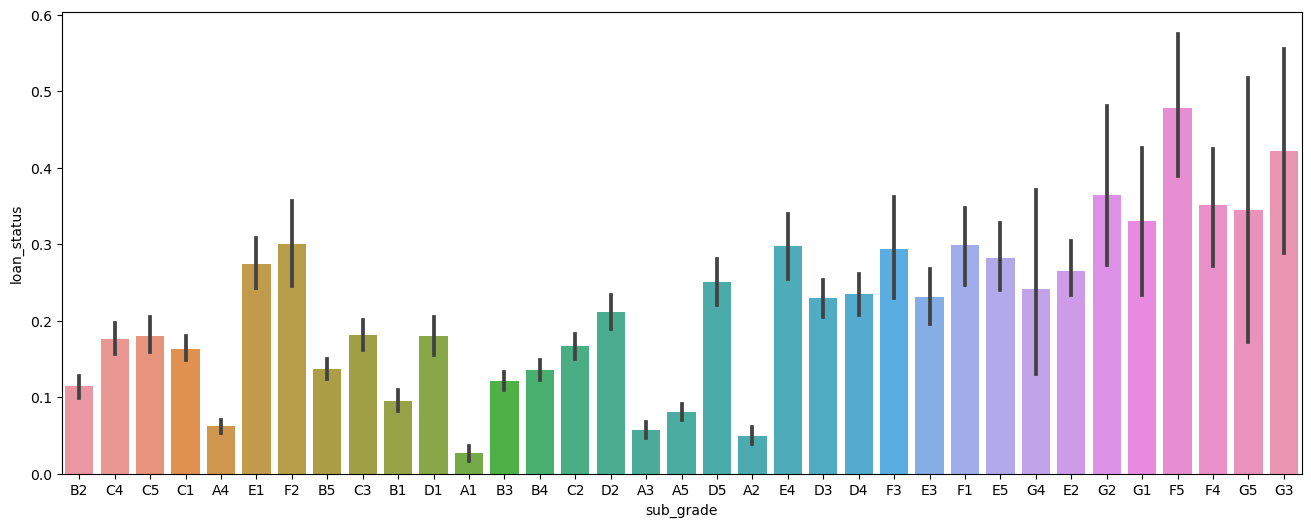

In [36]:
# plotting the sub-grade
plt.figure(figsize=(16, 6))
sns.barplot(data=inp0, x='sub_grade', y='loan_status')
plt.show()

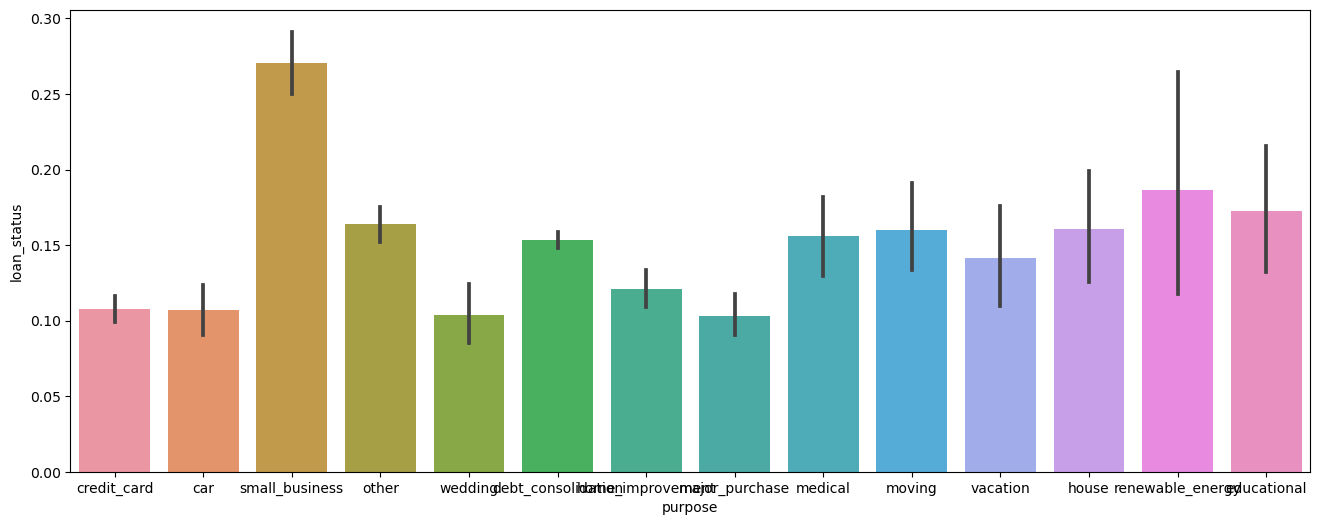

In [37]:
# purpose
plt.figure(figsize=(16, 6))
sns.barplot(data=inp0, x='purpose', y='loan_status')
plt.show()

small business have higher no. of default followed by renewable energy and education

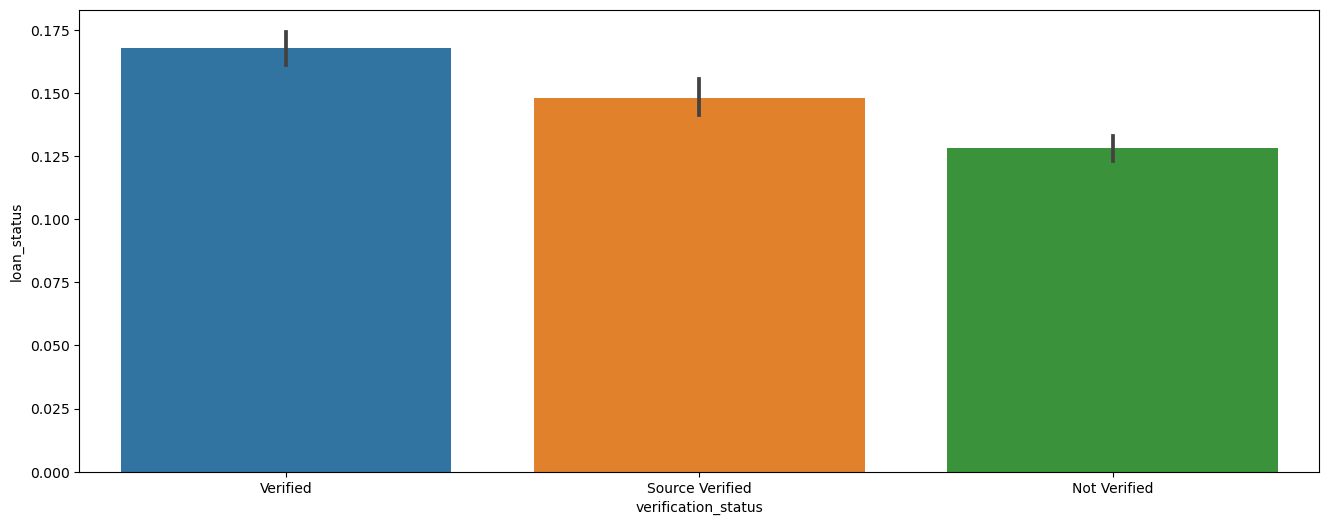

In [38]:
# verification_status
plt.figure(figsize=(16, 6))
sns.barplot(data=inp0, x='verification_status', y='loan_status')
plt.show()

Quite different as verified loan has higher no. of default then not verified.

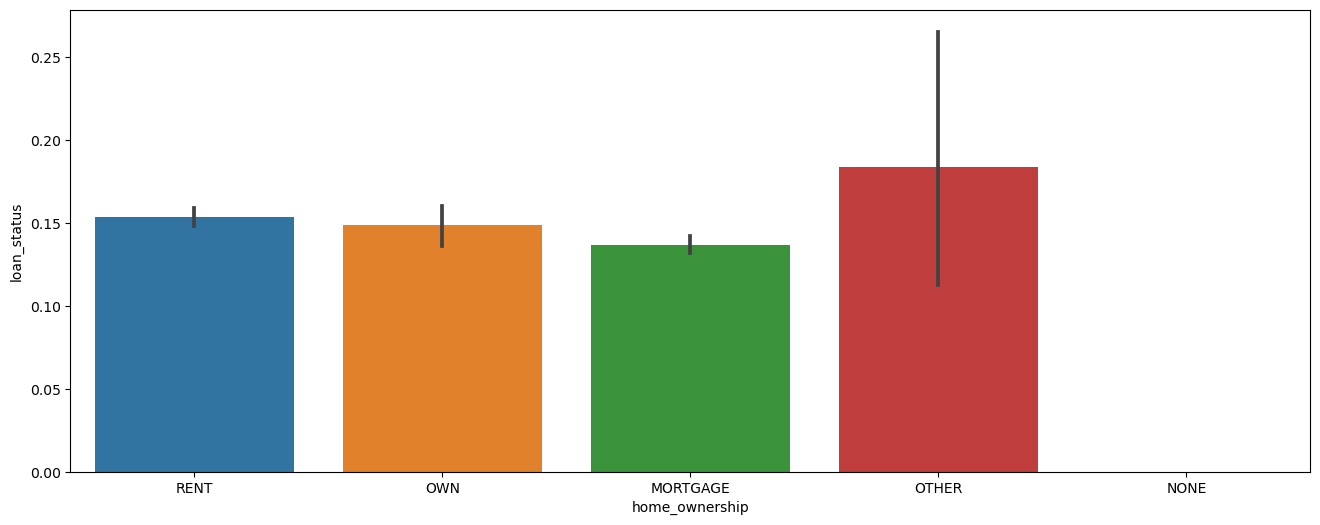

In [39]:
# home ownership
plt.figure(figsize=(16, 6))
sns.barplot(data=inp0, x='home_ownership', y='loan_status')
plt.show()

Not much difference.

### Now let's look into loans with time

In [40]:
# The distribution of loans across years
# convert the year column into datetime and then extract year and month from it
inp0['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [41]:
from datetime import datetime
inp0['issue_d'] = inp0['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [42]:
inp0['month'] = inp0['issue_d'].apply(lambda x: x.month)
inp0['year'] = inp0['issue_d'].apply(lambda x: x.year)

In [43]:
# Number of loans across years
inp0.groupby('year').year.count()


year
2007      251
2008     1562
2009     4716
2010    11532
2011    20516
Name: year, dtype: int64

 Number of loans has increased over years.

In [44]:
# number of loans across months
inp0.groupby('month').month.count()

month
1     2379
2     2358
3     2691
4     2831
5     2919
6     3180
7     3351
8     3388
9     3498
10    3761
11    4006
12    4215
Name: month, dtype: int64

Large no. of loans is in December or in 2nd half of the year.


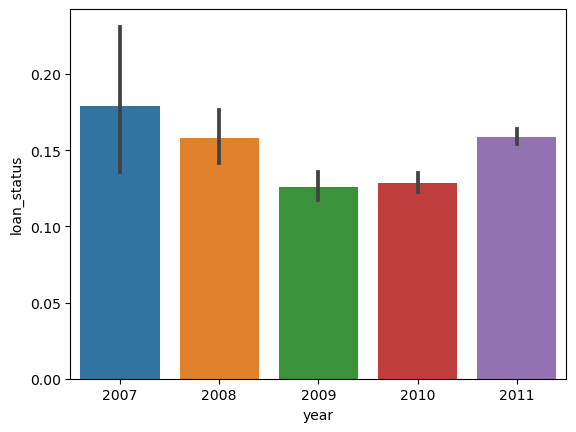

In [45]:
#compare the default rates across years.
sns.barplot(data=inp0, x='year', y='loan_status')
plt.show()

Rates are decreasing from 2007 to 2010 but it gradually start increasing in 2011.

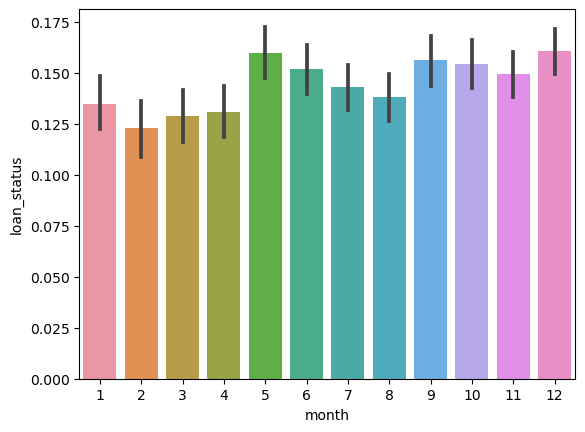

In [46]:
#compare the default rates across months.
sns.barplot(data=inp0, x='month', y='loan_status')
plt.show()

Not clear as there is very less variation.

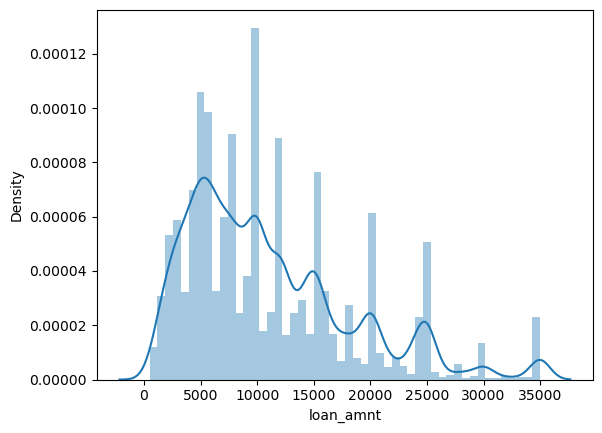

In [47]:
# Create a distribultion plot for loan amount: the median loan amount is around 10,000
sns.distplot(inp0['loan_amnt'])
plt.show()

 Binning the loan amount variable into small, medium, high, very high.

In [48]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
inp0['loan_amnt'] = inp0['loan_amnt'].apply(lambda x: loan_amount(x))

In [49]:
inp0['loan_amnt'].value_counts()

medium       20675
high          7696
low           7444
very high     2762
Name: loan_amnt, dtype: int64

Comparing the default rates across loan amount type

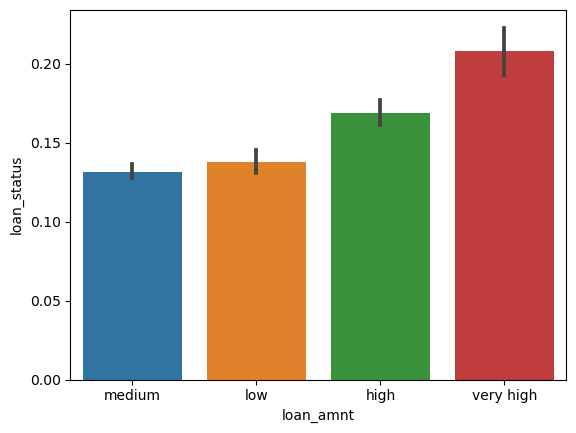

In [50]:
sns.barplot(data=inp0, x='loan_amnt', y='loan_status')
plt.show()

As we can see in this chart higher the loan amount higher the chances of default.

In [51]:
#convert funded amount invested to bins
inp0['funded_amnt_inv'] = inp0['funded_amnt_inv'].apply(lambda x: loan_amount(x))

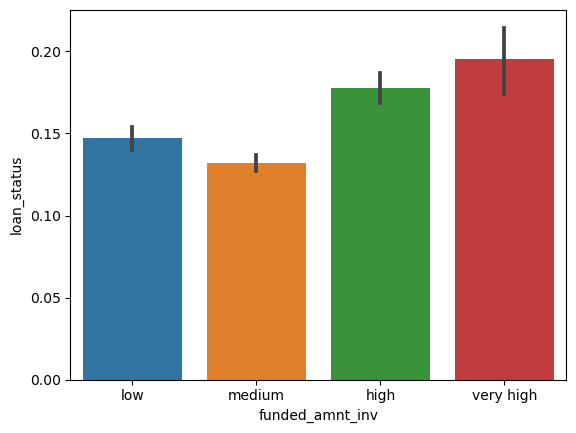

In [52]:
# funded amount invested
sns.barplot(data=inp0, x='funded_amnt_inv', y='loan_status')
plt.show()

In [58]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

inp0['annual_inc'] = inp0['annual_inc'].apply(lambda x: annual_income(x))

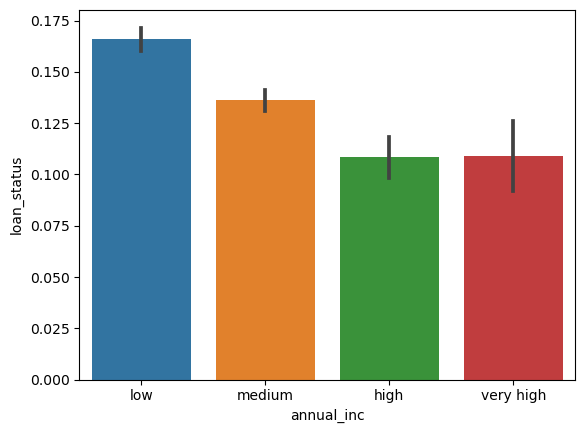

In [59]:
# annual income and default rate
sns.barplot(data=inp0, x='annual_inc', y='loan_status')
plt.show()

lower the annual income, higher the default rate.

In [64]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
inp0['installment'] = inp0['installment'].apply(lambda x: installment(x))

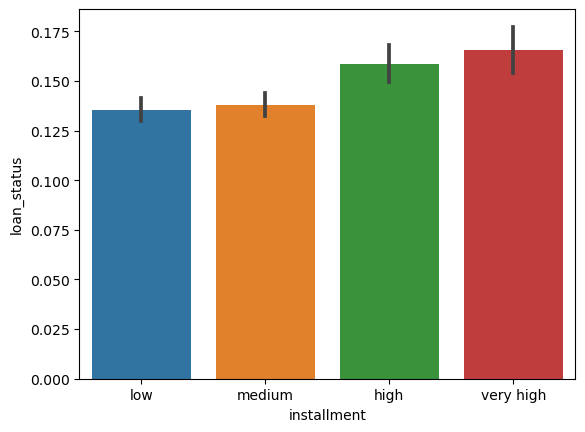

In [65]:
# Default rates across installment
sns.barplot(data=inp0, x='installment', y='loan_status')
plt.show()

higher installment amount, higher the default rate

In [67]:
# funded amount
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
inp0['funded_amnt'] = inp0['funded_amnt'].apply(lambda x: funded_amount(x))

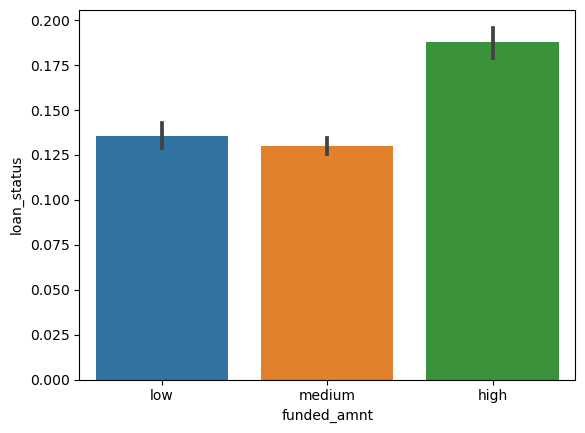

In [69]:
sns.barplot(data=inp0, x='funded_amnt', y='loan_status')
plt.show()

In [71]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

inp0['dti'] = inp0['dti'].apply(lambda x: dti(x))

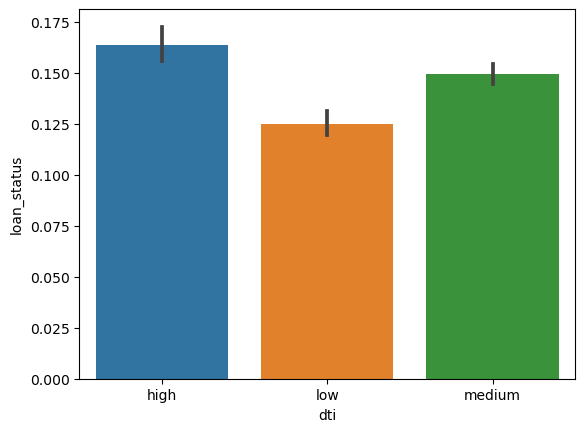

In [73]:
## Default rates across debt to income ratio
sns.barplot(data=inp0, x='dti', y='loan_status')
plt.show()

high dti means higher default rates

In [74]:
#convert interest rate to low, medium, high
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    

In [75]:
inp0['int_rate'] =inp0['int_rate'].apply(lambda x: int_rate(x))

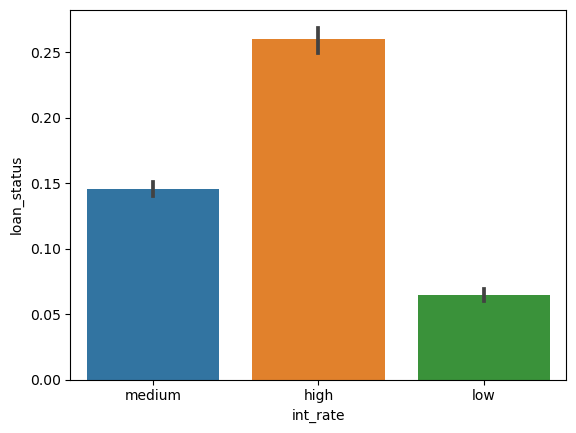

In [78]:
# Default rates across rates of interest
sns.barplot(data=inp0, x='int_rate', y='loan_status')
plt.show()

high interest rates means more default